In [ ]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
from keras.datasets import mnist
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_img = keras.utils.normalize(train_img, axis=1)
test_img = keras.utils.normalize(test_img, axis =1)

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.fit(train_img, train_lab, epochs=10)
model.save('model.h5')

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2195 - accuracy: 0.9331
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0906 - accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0629 - accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0468 - accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0367 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0284 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0258 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0225 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0186 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [ ]:
print(model.evaluate(test_img, test_lab))

313/313 [==============================] - 1s 3ms/step - loss: 0.0953 - accuracy: 0.9773
[0.09531960636377335, 0.9772999882698059]


In [ ]:
#Predicting First 10 test images
pred = model.predict(test_img[:10])
# print(pred)
p=np.argmax(pred, axis=1)
print(p)
print(test_lab[:10])

1/1 [==============================] - 0s 108ms/step
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


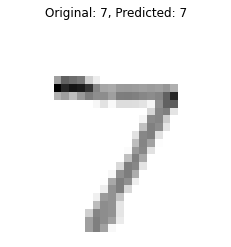

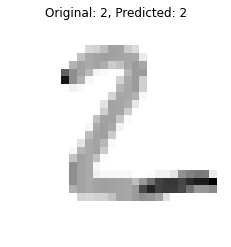

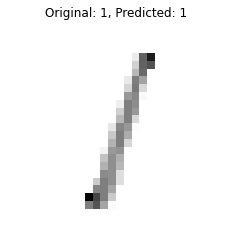

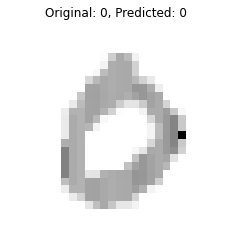

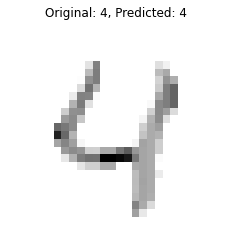

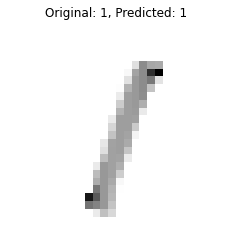

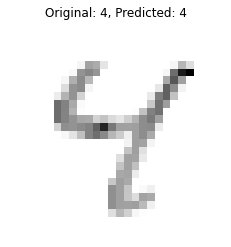

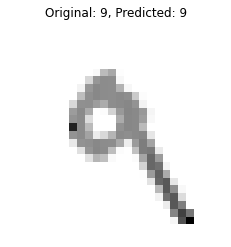

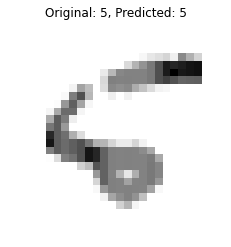

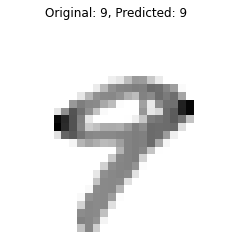

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(10):
  plt.imshow(test_img[i], cmap='binary')
  plt.title("Original: {}, Predicted: {}".format(test_lab[i], p[i]))
  plt.axis("Off")
  plt.figure()